In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, LocalOutlierFactor 

from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 

In [22]:

file_path = 'C:/Users/jackn/Python_projects/nfl_pts_and_vegas_2014-2023.csv' 
 


In [34]:
#path = "C:\Users\jackn\Python_projects\\"
#file = 'nfl_pts_and_vegas_2014-2023.csv' 
nfl_df = pd.read_csv(file_path)   
nfl_df = nfl_df.loc[nfl_df['Season'] > 2014]
print(nfl_df.info())  

<class 'pandas.core.frame.DataFrame'>
Index: 4521 entries, 496 to 5016
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Season   4521 non-null   int64  
 1   Week     4521 non-null   int64  
 2   Team     4521 non-null   object 
 3   Day      4521 non-null   object 
 4   Date     4521 non-null   object 
 5   Win      4521 non-null   int64  
 6   Home     4521 non-null   int64  
 7   Opp      4521 non-null   object 
 8   Off_Pts  4521 non-null   int64  
 9   Def_Pts  4521 non-null   int64  
 10  G        4521 non-null   int64  
 11  Spread   4521 non-null   float64
 12  Total    4521 non-null   float64
dtypes: float64(2), int64(7), object(4)
memory usage: 494.5+ KB
None


In [35]:
nfl_df = nfl_df.rename(columns={'Off_Pts': 'Tm_Pts', 'Def_Pts': 'Opp_Pts'}) 
nfl_df.head()

,Season,Week,Team,Day,Date,Win,Home,Opp,Tm_Pts,Opp_Pts,G,Spread,Total
496,2015,1,CRD,Sun,September 13,1,1,NOR,31,19,1,-2.0,48.5
497,2015,2,CRD,Sun,September 20,1,0,CHI,48,23,2,-2.0,46.0
498,2015,3,CRD,Sun,September 27,1,1,SFO,47,7,3,-6.5,45.0
499,2015,4,CRD,Sun,October 4,0,1,RAM,22,24,4,-7.0,44.0
500,2015,5,CRD,Sun,October 11,1,0,DET,42,17,5,-3.0,45.5


In [37]:
nfl_df['True_Total'] = nfl_df['Tm_Pts'] + nfl_df['Opp_Pts'] 
nfl_df['Over'] = np.where(nfl_df['True_Total'] > nfl_df['Total'], 1, 0) 
nfl_df['Under'] = np.where(nfl_df['True_Total'] < nfl_df['Total'], 1, 0) 
nfl_df['push'] = np.where(nfl_df['True_Total'] == nfl_df['Total'], 1, 0)  
print(nfl_df)

      Season  Week Team  Day  ... True_Total  Over  Under push
496     2015     1  CRD  Sun  ...         50     1      0    0
497     2015     2  CRD  Sun  ...         71     1      0    0
498     2015     3  CRD  Sun  ...         54     1      0    0
499     2015     4  CRD  Sun  ...         46     1      0    0
500     2015     5  CRD  Sun  ...         59     1      0    0
...      ...   ...  ...  ...  ...        ...   ...    ...  ...
5012    2023    13  WAS  Sun  ...         60     1      0    0
5013    2023    15  WAS  Sun  ...         48     0      1    0
5014    2023    16  WAS  Sun  ...         58     1      0    0
5015    2023    17  WAS  Sun  ...         37     0      1    0
5016    2023    18  WAS  Sun  ...         48     1      0    0

[4521 rows x 17 columns]


In [38]:
nfl_df = nfl_df.sort_values(by=['Season', 'Week']).reset_index(drop=True) 



Results for 2021:
Week  1: accuracy score=33.33%
Week  2: accuracy score=43.75%
Week  3: accuracy score=53.33%
Week  4: accuracy score=33.33%
Week  5: accuracy score=56.25%
Week  6: accuracy score=61.54%
Week  7: accuracy score=46.15%
Week  8: accuracy score=60.00%
Week  9: accuracy score=76.92%
Week 10: accuracy score=58.33%
Week 11: accuracy score=46.67%
Week 12: accuracy score=50.00%
Week 13: accuracy score=35.71%
Week 14: accuracy score=50.00%
Week 15: accuracy score=26.67%
Week 16: accuracy score=62.50%
Week 17: accuracy score=66.67%
Week 18: accuracy score=78.57%
Season 2021: Total accuracy score=51.94%

Classification Report for 2021:
              precision    recall  f1-score   support

        Over       0.49      0.54      0.52       122
       Under       0.55      0.50      0.52       136

    accuracy                           0.52       258
   macro avg       0.52      0.52      0.52       258
weighted avg       0.52      0.52      0.52       258



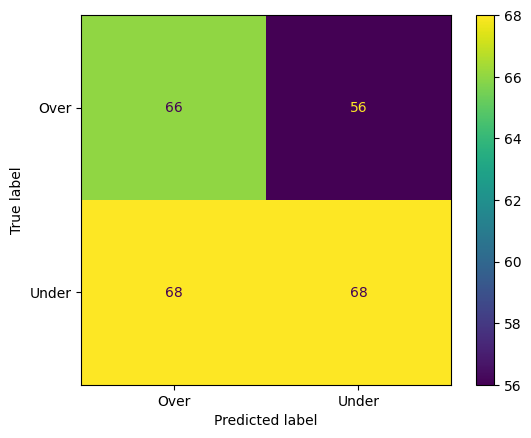


Results for 2022:
Week  1: accuracy score=50.00%
Week  2: accuracy score=28.57%
Week  3: accuracy score=73.33%
Week  4: accuracy score=50.00%
Week  5: accuracy score=53.33%
Week  6: accuracy score=61.54%
Week  7: accuracy score=58.33%
Week  8: accuracy score=23.08%
Week  9: accuracy score=33.33%
Week 10: accuracy score=58.33%
Week 11: accuracy score=30.77%
Week 12: accuracy score=50.00%
Week 13: accuracy score=30.77%
Week 14: accuracy score=53.85%
Week 15: accuracy score=50.00%
Week 16: accuracy score=50.00%
Week 17: accuracy score=69.23%
Week 18: accuracy score=50.00%
Season 2022: Total accuracy score=48.79%

Classification Report for 2022:
              precision    recall  f1-score   support

        Over       0.44      0.55      0.49       110
       Under       0.55      0.44      0.49       138

    accuracy                           0.49       248
   macro avg       0.49      0.49      0.49       248
weighted avg       0.50      0.49      0.49       248



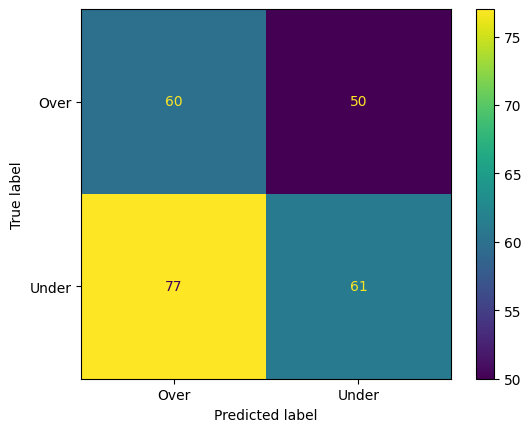


Results for 2023:
Week  1: accuracy score=33.33%
Week  2: accuracy score=71.43%
Week  3: accuracy score=62.50%
Week  4: accuracy score=64.29%
Week  5: accuracy score=78.57%
Week  6: accuracy score=50.00%
Week  7: accuracy score=66.67%
Week  8: accuracy score=46.67%
Week  9: accuracy score=66.67%
Week 10: accuracy score=50.00%
Week 11: accuracy score=66.67%
Week 12: accuracy score=71.43%
Week 13: accuracy score=54.55%
Week 14: accuracy score=36.36%
Week 15: accuracy score=53.85%
Week 16: accuracy score=41.67%
Week 17: accuracy score=50.00%
Week 18: accuracy score=38.46%
Season 2023: Total accuracy score=55.79%

Classification Report for 2023:
              precision    recall  f1-score   support

        Over       0.51      0.54      0.53       106
       Under       0.60      0.57      0.59       127

    accuracy                           0.56       233
   macro avg       0.56      0.56      0.56       233
weighted avg       0.56      0.56      0.56       233



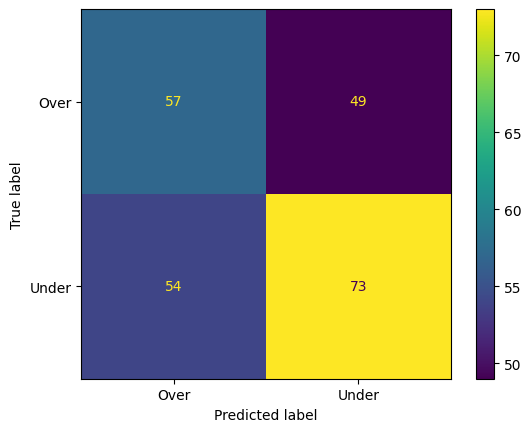

In [39]:
df = nfl_df.query('Home == 1').reset_index(drop=True) 

features = ['Spread', 'Total'] 
target = 'Under' 

for season in [2021, 2022, 2023]: 

    print(f'\nResults for {season}:')  

    y_preds = [] 
    y_trues = []   

    for week in range(1, 19): 
        print(f'Week {week:>2}:', end=' ') 

        train_df = df.query('Season < @season or (Season == @season and Week < @week)') 

        test_df = df.query('Season == @season and Week == @week and True_Total != Total')  

        X_train = train_df[features] 
        y_train = train_df[target] 
        X_test = test_df[features] 
        y_test = test_df[target] 

        model = KNeighborsClassifier(n_neighbors=7) 

        pipe = Pipeline([ 
            ('scaler', StandardScaler()), 
            ('model', KNeighborsClassifier(n_neighbors=7)) 
        ])  

        clf = pipe.fit(X_train, y_train) 

        pipe2 = Pipeline([ 
        ('scaler', StandardScaler()), 
        ('lof', LocalOutlierFactor(novelty=True))     
        ])
        pipe2.fit(X_train) 
        y_test_novelty = pipe2.predict(X_test)  

        mask = [y == 1 for y in y_test_novelty] 

        X_test = X_test[mask] 
        y_test = y_test[mask]  

        y_pred = clf.predict(X_test) 

        if week == 1: 
            y_test = test_df[target] 
            y_pred [1] * len(y_test) 

        y_true = y_test  

        print(f'accuracy score={accuracy_score(y_true, y_pred):.2%}') 

        y_preds += list(y_pred) 
        y_trues += list(y_true)  

    print(f'Season {season}: Total accuracy score={accuracy_score(y_trues, y_preds):.2%}')  

    print(f'\nClassification Report for {season}:') 
    print(classification_report(y_trues, y_preds, target_names=['Over', 'Under'])) 

    cm = confusion_matrix(y_trues, y_preds) 
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Over', 'Under']) 
    display.plot() 
    plt.grid(False) 
    plt.show()










In [41]:
df = nfl_df.query('Home == 1') 

features = ['Spread', 'Total'] 
target = 'Under' 

season = 2024 
week = 1 

train_df = df.query('Season < @season or (Season == @season and Week < @week)') 

X_train = train_df[features] 
y_train = train_df[target] 

week1 = [ 
    ['Ravens @ Chiefs', -3.0, 46.5],  
    ['Packers @ Eagles', -1.5, 48.5], 
    ['Cardinals @ Bills', -6.5, 48.0], 
    ['Panthers @ Saints', -5.0, 40.5], 
    ['Texans @ Colts', +2.0, 48.0]

] 

X_new = pd.DataFrame(week1, columns=['Game', 'Spread', 'Total']) 

pipe = Pipeline([ 
            ('scaler', StandardScaler()), 
            ('model', KNeighborsClassifier(n_neighbors=7)) 
        ])  

clf = pipe.fit(X_train, y_train) 


pipe2 = Pipeline([ 
('scaler', StandardScaler()), 
('lof', LocalOutlierFactor(novelty=True))      
        ])  
pipe2.fit(X_train) 
y_test_novelty = pipe2.predict(X_new[features])

mask = [y == 1 for y in y_test_novelty] 
X_new = X_new[mask]

y_pred = clf.predict(X_new[features])  

if week == 1: 
    y_pred = [1] * len(X_new) 

X_new['KNC(7)'] = y_pred 
X_new['KNC(7)'] = X_new['KNC(7)'].apply(lambda x: 'Under' if x == 1 else 'Over') 

print(f'MODEL PREDICTIONS FOR WEEK {week} OF THE {season} NFL SEASON\n') 
print(X_new[['Game', 'Spread', 'Total', 'KNC(7)']])



MODEL PREDICTIONS FOR WEEK 1 OF THE 2024 NFL SEASON

                Game  Spread  Total KNC(7)
0    Ravens @ Chiefs    -3.0   46.5  Under
1   Packers @ Eagles    -1.5   48.5  Under
2  Cardinals @ Bills    -6.5   48.0  Under
3  Panthers @ Saints    -5.0   40.5  Under
4     Texans @ Colts     2.0   48.0  Under
